In [4]:
from date_iqr import column
! pip install nltk pandas numpy python-Levenshtein matplotlib seaborn

  Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
     |████████████████████████████████| 287 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 34.9 MB/s eta 0:00:01
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
You should consider upgrading via the '/Users/matthew.g/Code/bird_probability/venv/bin/python -m pip install --upgrade pip' command.


In [144]:
import pandas as pd 
import nltk
import pandas as pd
import numpy as np
import Levenshtein as lev
import seaborn as sns
import matplotlib.pyplot as plt
import random
import tqdm


In [147]:
sequences.shape

(107,)

In [166]:

# Sample data (replace this with your actual data)
df = pd.read_csv('./data/sequences.csv')
df.drop(columns=['Length'], inplace=True)
# Create a DataFrame
lookup = df.set_index("Bird ID")["Sequence"].to_dict()


# Generate pairwise Levenshtein distance matrix
ids = df["Bird ID"].values
sequences = df["Sequence"].values
n = len(sequences)

# Initialize distance matrix
distance_matrix = np.zeros((n, n))

# Compute Levenshtein distances
for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = lev.distance(sequences[i], sequences[j])

# Create a DataFrame for visualization
distance_df = pd.DataFrame(distance_matrix, index=ids, columns=ids)






n = len(distance_matrix)
similarity_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        max_sequence = max([lookup[df["Bird ID"].values[i]], lookup[df["Bird ID"].values[j]]], key=len)
        # print([lookup(df["Bird ID"].values[i]), lookup(df["Bird ID"].values[j])])
        #sim = 1 - (21 / len(longest_seq))
        similarity_matrix[i, j] = 1 - (distance_matrix[i, j] / len(max_sequence))

distance_df

,BKWH,DBRE,KPUR,KWYX,L04,L12,L13,L22,L24,L26,...,T011,T012,T031,T1011,T1711,T1712,T1911,T2412,T2612,T2712
BKWH,0.0,21.0,24.0,21.0,23.0,25.0,20.0,20.0,21.0,20.0,...,23.0,25.0,26.0,21.0,20.0,21.0,22.0,24.0,25.0,25.0
DBRE,21.0,0.0,17.0,20.0,17.0,30.0,21.0,22.0,16.0,16.0,...,19.0,23.0,26.0,23.0,15.0,17.0,20.0,22.0,18.0,19.0
KPUR,24.0,17.0,0.0,18.0,15.0,27.0,20.0,20.0,17.0,17.0,...,19.0,24.0,26.0,22.0,15.0,20.0,21.0,19.0,18.0,19.0
KWYX,21.0,20.0,18.0,0.0,19.0,23.0,22.0,24.0,20.0,16.0,...,20.0,23.0,23.0,22.0,19.0,19.0,20.0,22.0,22.0,22.0
L04,23.0,17.0,15.0,19.0,0.0,26.0,20.0,22.0,10.0,16.0,...,23.0,23.0,25.0,23.0,14.0,19.0,23.0,22.0,20.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1712,21.0,17.0,20.0,19.0,19.0,27.0,22.0,23.0,18.0,15.0,...,18.0,18.0,22.0,21.0,17.0,0.0,17.0,21.0,12.0,19.0
T1911,22.0,20.0,21.0,20.0,23.0,28.0,19.0,22.0,22.0,23.0,...,17.0,20.0,20.0,21.0,18.0,17.0,0.0,16.0,15.0,16.0
T2412,24.0,22.0,19.0,22.0,22.0,26.0,23.0,20.0,21.0,24.0,...,13.0,23.0,22.0,20.0,21.0,21.0,16.0,0.0,16.0,12.0
T2612,25.0,18.0,18.0,22.0,20.0,29.0,22.0,20.0,19.0,21.0,...,14.0,20.0,24.0,20.0,18.0,12.0,15.0,16.0,0.0,14.0


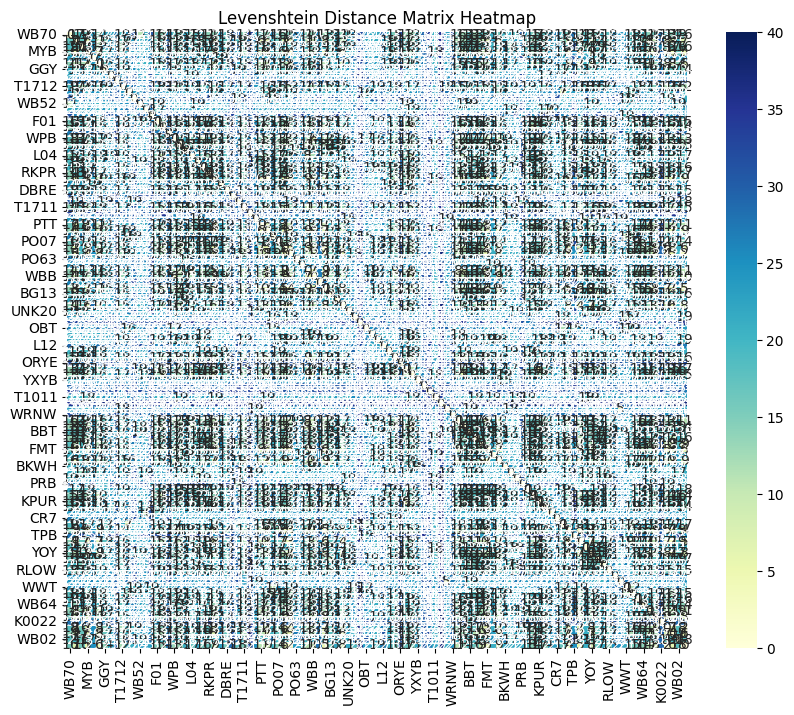

In [148]:
## print heatmap of distance df 
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Levenshtein Distance Matrix Heatmap")
plt.show()



In [149]:

# Sample data (replace this with your actual data)
df = pd.read_csv('./data/sequences.csv')
df.drop(columns=['Length'], inplace=True)

# Create a lookup dictionary
lookup = df.set_index("Bird ID")["Sequence"].to_dict()

# Generate pairwise Levenshtein distance matrix
ids = df["Bird ID"].values
sequences = df["Sequence"].values
populations = df["Population"].values
n = len(sequences)

# Initialize distance matrix
distance_matrix = np.zeros((n, n))

# Compute Levenshtein distances
for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = lev.distance(sequences[i], sequences[j])

# Create similarity matrix
similarity_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        max_sequence = max([lookup[ids[i]], lookup[ids[j]]], key=len)
        similarity_matrix[i, j] = 1 - (distance_matrix[i, j] / len(max_sequence))

# Convert similarity matrix to DataFrame for easier processing
similarity_df = pd.DataFrame(similarity_matrix, index=ids, columns=ids)
np.fill_diagonal(similarity_matrix, np.nan)
similarity_df


,BKWH,DBRE,KPUR,KWYX,L04,L12,L13,L22,L24,L26,...,T011,T012,T031,T1011,T1711,T1712,T1911,T2412,T2612,T2712
BKWH,NaN,0.222222,0.111111,0.222222,0.148148,0.242424,0.259259,0.259259,0.222222,0.259259,...,0.148148,0.074074,0.103448,0.222222,0.259259,0.222222,0.185185,0.111111,0.074074,0.074074
DBRE,0.222222,NaN,0.055556,0.130435,0.055556,0.090909,0.192308,0.120000,0.111111,0.200000,...,0.208333,0.148148,0.103448,0.115385,0.166667,0.150000,0.200000,0.083333,0.142857,0.208333
KPUR,0.111111,0.055556,NaN,0.217391,0.117647,0.181818,0.230769,0.200000,0.000000,0.150000,...,0.208333,0.111111,0.103448,0.153846,0.117647,0.000000,0.160000,0.208333,0.142857,0.208333
KWYX,0.222222,0.130435,0.217391,NaN,0.173913,0.303030,0.153846,0.040000,0.130435,0.304348,...,0.166667,0.148148,0.206897,0.153846,0.173913,0.173913,0.200000,0.083333,0.043478,0.083333
L04,0.148148,0.055556,0.117647,0.173913,NaN,0.212121,0.230769,0.120000,0.333333,0.200000,...,0.041667,0.148148,0.137931,0.115385,0.000000,0.050000,0.080000,0.083333,0.047619,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1712,0.222222,0.150000,0.000000,0.173913,0.050000,0.181818,0.153846,0.080000,0.100000,0.250000,...,0.250000,0.333333,0.241379,0.192308,0.150000,NaN,0.320000,0.125000,0.428571,0.208333
T1911,0.185185,0.200000,0.160000,0.200000,0.080000,0.151515,0.269231,0.120000,0.120000,0.080000,...,0.320000,0.259259,0.310345,0.192308,0.280000,0.320000,NaN,0.360000,0.400000,0.360000
T2412,0.111111,0.083333,0.208333,0.083333,0.083333,0.212121,0.115385,0.200000,0.125000,0.000000,...,0.458333,0.148148,0.241379,0.230769,0.125000,0.125000,0.360000,NaN,0.333333,0.500000
T2612,0.074074,0.142857,0.142857,0.043478,0.047619,0.121212,0.153846,0.200000,0.095238,0.000000,...,0.416667,0.259259,0.172414,0.230769,0.142857,0.428571,0.400000,0.333333,NaN,0.416667


In [157]:
# Group by population
df["Index"] = range(len(df))  # Add indices for easier grouping
group_indices = df.groupby("Population")["Index"].apply(list)

# Compute LSI averages
results = []

for group1, indices1 in group_indices.items():
    for group2, indices2 in group_indices.items():
        # Subset similarity matrix
        submatrix = similarity_matrix[np.ix_(indices1, indices2)]
        
        # Exclude NaN values (ignoring the diagonal)
        valid_values = submatrix[~np.isnan(submatrix)]
        
        # Calculate the mean of valid values
        if valid_values.size > 0:
            lsi_average = valid_values.mean()
        else:
            lsi_average = np.nan  # If no valid values, set to NaN

        results.append({
            "Population 1": group1,
            "Population 2": group2,
            "LSI Average": lsi_average
        })

# Convert results to DataFrame
lsi_averages_df = pd.DataFrame(results)

# Display results
print(lsi_averages_df)

   Population 1 Population 2  LSI Average
0            FL           FL     0.202730
1            FL           GA     0.143979
2            FL           MA     0.174004
3            FL           MD     0.147152
4            FL           NE     0.166175
5            FL           OH     0.152666
6            FL           TX     0.149168
7            GA           FL     0.143979
8            GA           GA     0.181893
9            GA           MA     0.156204
10           GA           MD     0.138388
11           GA           NE     0.131552
12           GA           OH     0.129449
13           GA           TX     0.128280
14           MA           FL     0.174004
15           MA           GA     0.156204
16           MA           MA     0.175926
17           MA           MD     0.184280
18           MA           NE     0.142490
19           MA           OH     0.167081
20           MA           TX     0.144537
21           MD           FL     0.147152
22           MD           GA     0

# Clean up and loop

In [203]:
## By state
from tqdm import tqdm


def shuffle_states(scope_df): 
    shuffled_df = scope_df 
    population_list = scope_df['Population'].tolist()
    random.shuffle(population_list)
    shuffled_df['Population'] = pd.Series(population_list)
    shuffled_df = shuffled_df.sort_values(by='Population', ascending=False).reset_index(drop=True)
    return shuffled_df

## import the data 

count = 1000




populations = []
distances = []
similarities = []

lsi_averages = []

for x in tqdm(range(count)): 
    # Sample data (replace this with your actual data)
    df = pd.read_csv('./data/sequences.csv')
    df.drop(columns=['Length'], inplace=True)
    # Create a DataFrame
    lookup = df.set_index("Bird ID")["Sequence"].to_dict()
    if count == 1: 
        scope_df = df
    else: 
        scope_df = shuffle_states(df)
    
    populations.append(scope_df)

    # Create a DataFrame
    lookup = scope_df.set_index("Bird ID")["Sequence"].to_dict()
    
    # Generate pairwise Levenshtein distance matrix
    ids = scope_df["Bird ID"].values
    sequences = scope_df["Sequence"].values
    n = len(sequences)
    
    # Initialize distance matrix
    distance_matrix = np.zeros((n, n))

    # Compute Levenshtein distances
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = lev.distance(sequences[i], sequences[j])

    # Create a DataFrame for visualization
    distance_df = pd.DataFrame(distance_matrix, index=ids, columns=ids)
    distances.append(distance_df)

    # Calculate the Similarities Matrix
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            max_sequence = max([lookup[ids[i]], lookup[ids[j]]], key=len)
            similarity_matrix[i, j] = 1 - (distance_matrix[i, j] / len(max_sequence))

    # Convert similarity matrix to DataFrame for easier processing
    np.fill_diagonal(similarity_matrix, np.nan)
    similarity_df = pd.DataFrame(similarity_matrix, index=ids, columns=ids)

    ## Compute the LSI Averages
    # Group by population
    scope_df["Index"] = range(len(scope_df))  # Add indices for easier grouping
    group_indices = scope_df.groupby("Population")["Index"].apply(list)

    # Compute LSI averages
    results = []

    for group1, indices1 in group_indices.items():
        for group2, indices2 in group_indices.items():
            # Subset similarity matrix
            submatrix = similarity_matrix[np.ix_(indices1, indices2)]

            # Exclude NaN values (ignoring the diagonal)
            valid_values = submatrix[~np.isnan(submatrix)]

            # Calculate the mean of valid values
            if valid_values.size > 0:
                lsi_average = valid_values.mean()
            else:
                lsi_average = np.nan  # If no valid values, set to NaN

            results.append({
                "Population 1": group1,
                "Population 2": group2,
                "LSI Average": lsi_average
            })

    # Convert results to DataFrame
    lsi_averages_df = pd.DataFrame(results)


    lsi_averages.append(lsi_averages_df)
    
    
    
    
lsi_averages_df

combined_lsi = pd.concat(lsi_averages, ignore_index=True)
# Group by the state pairs and calculate the mean LSI
state_comparison_averages = (
    combined_lsi.groupby(['Population 1', 'Population 2'])['LSI Average']
    .mean()
    .reset_index()
)

# Display the results
print(state_comparison_averages)
state_comparison_averages.to_csv('./data/state_comparison_averages.csv')

100%|██████████| 1000/1000 [00:27<00:00, 35.94it/s]

   Population 1 Population 2  LSI Average
0            FL           FL     0.187169
1            FL           GA     0.187111
2            FL           MA     0.186925
3            FL           MD     0.187373
4            FL           NE     0.186482
5            FL           OH     0.186975
6            FL           TX     0.187439
7            GA           FL     0.187111
8            GA           GA     0.187563
9            GA           MA     0.187567
10           GA           MD     0.187603
11           GA           NE     0.186155
12           GA           OH     0.187521
13           GA           TX     0.188113
14           MA           FL     0.186925
15           MA           GA     0.187567
16           MA           MA     0.187348
17           MA           MD     0.187737
18           MA           NE     0.186852
19           MA           OH     0.186920
20           MA           TX     0.187662
21           MD           FL     0.187373
22           MD           GA     0

In [215]:
from tqdm import tqdm


def shuffle_states(scope_df): 
    shuffled_df = scope_df 
    population_list = scope_df['Population'].tolist()
    random.shuffle(population_list)
    shuffled_df['Population'] = pd.Series(population_list)
    shuffled_df = shuffled_df.sort_values(by='Population', ascending=False).reset_index(drop=True)
    return shuffled_df


def shuffle_sequences(scope_df):
    new_df = scope_df
    sequences1 = scope_df['Sequence'].tolist()
    sequences2 = []
    for seq in sequences1: 
        new_seq = list(seq)
        random.shuffle(new_seq)
        sequences2.append(''.join(new_seq))
    new_df['Sequence'] = pd.Series(sequences2)
    
    return scope_df

## import the data 

count = 1000




populations = []
distances = []
similarities = []

lsi_averages = []

for x in tqdm(range(count)): 
    # Sample data (replace this with your actual data)
    df = pd.read_csv('./data/sequences.csv')
    df.drop(columns=['Length'], inplace=True)
    # Create a DataFrame
    lookup = df.set_index("Bird ID")["Sequence"].to_dict()
    if count == 1: 
        scope_df = df
    else: 
        scope_df = shuffle_sequences(df)
    
    populations.append(scope_df)

    # Create a DataFrame
    lookup = scope_df.set_index("Bird ID")["Sequence"].to_dict()
    
    # Generate pairwise Levenshtein distance matrix
    ids = scope_df["Bird ID"].values
    sequences = scope_df["Sequence"].values
    n = len(sequences)
    
    # Initialize distance matrix
    distance_matrix = np.zeros((n, n))

    # Compute Levenshtein distances
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = lev.distance(sequences[i], sequences[j])

    # Create a DataFrame for visualization
    distance_df = pd.DataFrame(distance_matrix, index=ids, columns=ids)
    distances.append(distance_df)

    # Calculate the Similarities Matrix
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            max_sequence = max([lookup[ids[i]], lookup[ids[j]]], key=len)
            similarity_matrix[i, j] = 1 - (distance_matrix[i, j] / len(max_sequence))

    # Convert similarity matrix to DataFrame for easier processing
    np.fill_diagonal(similarity_matrix, np.nan)
    similarity_df = pd.DataFrame(similarity_matrix, index=ids, columns=ids)

    ## Compute the LSI Averages
    # Group by population
    scope_df["Index"] = range(len(scope_df))  # Add indices for easier grouping
    group_indices = scope_df.groupby("Population")["Index"].apply(list)

    # Compute LSI averages
    results = []

    for group1, indices1 in group_indices.items():
        for group2, indices2 in group_indices.items():
            # Subset similarity matrix
            submatrix = similarity_matrix[np.ix_(indices1, indices2)]

            # Exclude NaN values (ignoring the diagonal)
            valid_values = submatrix[~np.isnan(submatrix)]

            # Calculate the mean of valid values
            if valid_values.size > 0:
                lsi_average = valid_values.mean()
            else:
                lsi_average = np.nan  # If no valid values, set to NaN

            results.append({
                "Population 1": group1,
                "Population 2": group2,
                "LSI Average": lsi_average
            })

    # Convert results to DataFrame
    lsi_averages_df = pd.DataFrame(results)


    lsi_averages.append(lsi_averages_df)
    
    
    
    
lsi_averages_df

combined_lsi = pd.concat(lsi_averages, ignore_index=True)
# Group by the state pairs and calculate the mean LSI
sequence_shuffle_averages = (
    combined_lsi.groupby(['Population 1', 'Population 2'])['LSI Average']
    .mean()
    .reset_index()
)

# Display the results
print(sequence_shuffle_averages)
sequence_shuffle_averages.to_csv('./data/sequence_shuffle_averages_1K_itterations.csv')


100%|██████████| 1000/1000 [00:29<00:00, 34.31it/s]


   Population 1 Population 2  LSI Average
0            FL           FL     0.194808
1            FL           GA     0.151565
2            FL           MA     0.185487
3            FL           MD     0.146862
4            FL           NE     0.169493
5            FL           OH     0.155289
6            FL           TX     0.147403
7            GA           FL     0.151565
8            GA           GA     0.164159
9            GA           MA     0.171420
10           GA           MD     0.138130
11           GA           NE     0.139614
12           GA           OH     0.136695
13           GA           TX     0.130825
14           MA           FL     0.185487
15           MA           GA     0.171420
16           MA           MA     0.205299
17           MA           MD     0.172960
18           MA           NE     0.162669
19           MA           OH     0.167325
20           MA           TX     0.146014
21           MD           FL     0.146862
22           MD           GA     0

In [216]:
sequence_shuffle_averages[sequence_shuffle_averages['Population 1'] == sequence_shuffle_averages['Population 2'] ][['LSI Average']].mean()

LSI Average    0.188914
dtype: float64

In [217]:
sequence_shuffle_averages[~(sequence_shuffle_averages['Population 1'] == sequence_shuffle_averages['Population 2'])][['LSI Average']].mean()

LSI Average    0.154409
dtype: float64